# Gerar CSV

- Versão feita em **18 outubro de 2023** para rodar no Colab

**Missão:** Este arquivo tem por objetivo a partir de um conjunto de arquivos JSON, gerar um arquivo CSV.

*Extras* (aproveitamento do êxito): É feita uma breve análise do dataset

# Manipulação de JSON

## Parâmetros

- Aqui estamos setando a variável "pasta" para o nome do diretório onde se encontrará o nosso dataset, após a extração.

In [2]:
pasta = 'dataset'
arquivo = 'dataset.rar'

### Ignorando avisos no Pandas

In [3]:
import warnings
# Ignorar o warning específico
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Importe o arquivo RAR

- A ideia aqui é importarmos a pasta dataset.rar para o colab

- Depois de importar, devemos descompatar, seguindo as células a seguir:

In [4]:
!pip install rarfile

In [5]:
import rarfile
import glob
import os

# Abra o arquivo RAR
rar = rarfile.RarFile(arquivo)

# Extraia todos os arquivos para um diretório específico
rar.extractall('')

# Feche o arquivo RAR
rar.close()

* Só para garantir iremos excluir o arquivo modelo.json, caso exista:

In [6]:
if os.path.exists("dataset/modelo.json"):
    os.remove("dataset/modelo.json")
    print("Arquivo 'modelo.json' excluído com sucesso!")
else:
    print("O arquivo 'modelo.json' não existe na pasta 'dataset'.")

O arquivo 'modelo.json' não existe na pasta 'dataset'.


- Aqui iremos contar a quantidade de arquivos JSON:

In [7]:
arquivos_json = glob.glob(os.path.join(pasta, '*.json'))

quantidade = len(arquivos_json)
print("Quantidade de arquivos JSON na pasta " + pasta + ":    " + str(quantidade))

Quantidade de arquivos JSON na pasta dataset:    168


## Abrindo um conjunto de JSON em uma pasta

- Bibliotecas:

In [8]:
import os
import json
import pandas as pd
import codecs

- Setando a pasta

In [9]:
#Diretório atual
cwd = os. getcwd()
print(cwd)

/content


## Criando o dataframe a partir dos arquivos JSON

In [10]:
df = pd.DataFrame(columns=['id','titulo', 'autor','url', 'tipo_documento',  'rotulo',  'resumo', 'texto'])

In [11]:
df

Empty DataFrame
Columns: [id, titulo, autor, url, tipo_documento, rotulo, resumo, texto]
Index: []

In [12]:
for nome_arquivo in os.listdir(pasta):
    caminho_arquivo = os.path.join(pasta, nome_arquivo)
    print(caminho_arquivo)
    # Verifique se o arquivo é um arquivo JSON
    if nome_arquivo.endswith('.json') and os.path.isfile(caminho_arquivo):
        dados = json.load(codecs.open(caminho_arquivo, 'r', 'utf-8-sig'))
        df_json = pd.DataFrame([dados])
        df = pd.concat([df, df_json], ignore_index=True)
        # O método append deixará de ser usado em breve
        # df = df.append(dados, ignore_index=True)

dataset/149.json
dataset/132.json
dataset/5.json
dataset/94.json
dataset/133.json
dataset/186.json
dataset/10.json
dataset/104.json
dataset/184.json
dataset/121.json
dataset/102.json
dataset/38.json
dataset/7.json
dataset/91.json
dataset/158.json
dataset/57.json
dataset/108.json
dataset/49.json
dataset/168.json
dataset/86.json
dataset/22.json
dataset/115.json
dataset/24.json
dataset/78.json
dataset/53.json
dataset/148.json
dataset/159.json
dataset/1.json
dataset/134.json
dataset/88.json
dataset/28.json
dataset/42.json
dataset/116.json
dataset/79.json
dataset/171.json
dataset/128.json
dataset/2.json
dataset/90.json
dataset/181.json
dataset/12.json
dataset/176.json
dataset/180.json
dataset/141.json
dataset/39.json
dataset/187.json
dataset/60.json
dataset/73.json
dataset/34.json
dataset/11.json
dataset/179.json
dataset/144.json
dataset/169.json
dataset/119.json
dataset/20.json
dataset/76.json
dataset/156.json
dataset/80.json
dataset/36.json
dataset/63.json
dataset/138.json
dataset/54.json

In [13]:
df

id                                             titulo  \
0    149  detecção de embarcações em imagens de sensores...   
1    132   uma arquitetura de alta velocidade para siste...   
2      5  acessórios para morteiro são testados no centr...   
3     94  absorvedores de micro-ondas baseados em aditiv...   
4    133  uma arquitetura para sistemas micropipeline de...   
..   ...                                                ...   
163   97  estudo para simulação da seção reta radar de a...   
164   23  exército e embraer apresentam radar desenvolvi...   
165   95  análise comparativa das técnicas de geração fo...   
166  183  rastreamento de veículos com emprego de sensor...   
167  142  planejamento de trajetória de múltiplos robôs ...   

                                                 autor  \
0    nadjane c. de almeida, carlos frederico de sá ...   
1     duarte l. oliveira, diego bompean, lester a. ...   
2                               Noticiário do Exército   
3    simone s. pinto, newton a. s. gomes, mirabel c...   
4    duarte l. oliveira, kledermon garcia, roberto ...   
..                                                 ...   
163  ricardo e. g. da silva, newton a.s. gomes, mau...   
164                             Noticiário do Exército   
165  rodrigo de faria baroni, joaquim j. barroso, j...   
166                  danilo habermann e claudio garcia   
167  johnathan fercher da rosa, paulo fernando ferr...   

                                                   url      tipo_documento  \
0    http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   
1    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
2    https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
3    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
4    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
..                                                 ...                 ...   
163  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
164  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
165  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
166  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
167  http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   

    rotulo                                             resumo  \
0        1  Neste artigo é apresentado um método de detecç...   
1        1  Projeto digital VLSI (Very Large Scale Integra...   
2        2                                                  0   
3        1  Este trabalho tem como objetivo principal most...   
4        1  O paradigma assíncrono possui características ...   
..     ...                                                ...   
163      1  Os materiais absorvedores de radiação eletroma...   
164      3                                                  0   
165      1  A geração fotônica de sinais para aplicação em...   
166      2  Este artigo apresenta um sistema de rastreamen...   
167      2   Este artigo demonstra uma abordagem para trat...   

                                                 texto  
0     1. INTRODUÇÃO A extração de recursos provenie...  
1      I. INTRODUÇÃO Sistemas digitais contemporâne...  
2    Rio de Janeiro (RJ) – O Centro de Avaliações d...  
3     I. INTRODUÇÃO Como consequência dos avanços t...  
4    I. INTRODUÇÃO Sistemas digitais embarcados req...  
..                                                 ...  
163  I. INTRODUÇÃO Materiais absorvedores de radiaç...  
164  Campinas (SP) – Um dia histórico para o desenv...  
165   I. INTRODUÇÃO A geração de sinais de radiofre...  
166   I. INTRODUÇÃO Desde 2002 a agência americana ...  
167   1. Introdução A robótica vem evoluindo muito ...  

[168 rows x 8 columns]

- Mudando o tipo das colunas **id** e **rotulo** para int

In [14]:
df['id'] = df['id'].astype(int)
df['rotulo'] = df['rotulo'].astype(int)

## Explorando o dataframe

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              168 non-null    int64 
 1   titulo          168 non-null    object
 2   autor           168 non-null    object
 3   url             168 non-null    object
 4   tipo_documento  168 non-null    object
 5   rotulo          168 non-null    int64 
 6   resumo          168 non-null    object
 7   texto           168 non-null    object
dtypes: int64(2), object(6)
memory usage: 10.6+ KB


In [16]:
quantidade_por_grupo = df.groupby('rotulo').size()
print(quantidade_por_grupo)

rotulo
1    94
2    41
3    33
dtype: int64


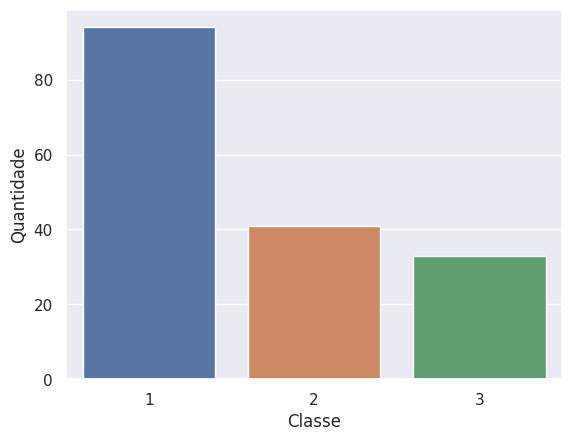

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='rotulo')
ax.set_ylabel("Quantidade")
ax.set_xlabel("Classe")

plt.show()

- Gerando um gráfico de *Pizza*

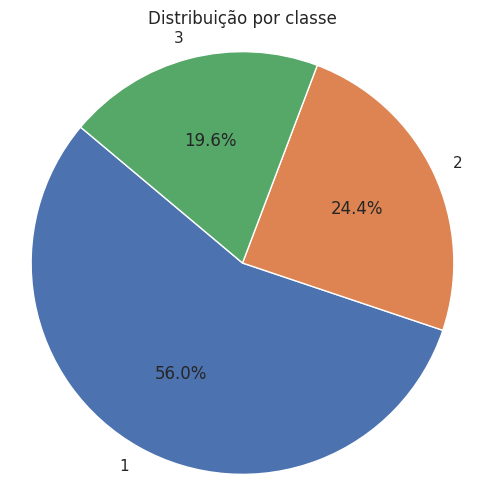

In [18]:
# Calcular a contagem de cada tipo
contagem_tipos = df['rotulo'].value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(6, 6))
plt.pie(contagem_tipos, labels=contagem_tipos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por classe')
plt.axis('equal')  # Isso garante que o gráfico seja circular
plt.show()

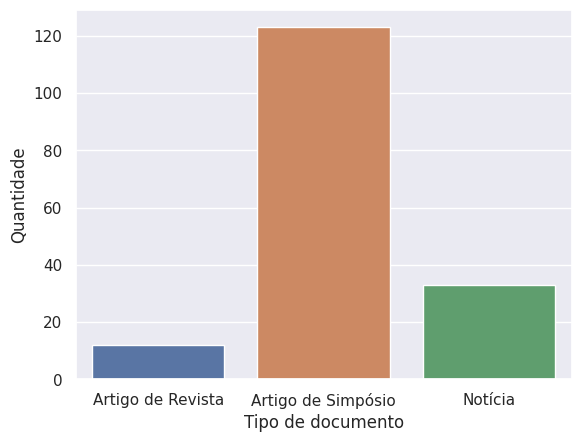

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='tipo_documento')
ax.set_ylabel("Quantidade")
ax.set_xlabel("Tipo de documento")

plt.show()

- Gerando um gráfico de *Pizza*

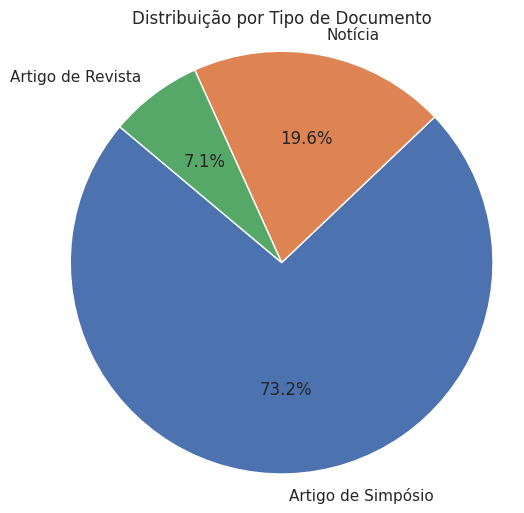

In [20]:
# Calcular a contagem de cada tipo
contagem_tipos = df['tipo_documento'].value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(6, 6))
plt.pie(contagem_tipos, labels=contagem_tipos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por Tipo de Documento')
plt.axis('equal')  # Isso garante que o gráfico seja circular
plt.show()

## Alterando resumo

In [21]:
df.head(2)

id                                             titulo  \
0  149  detecção de embarcações em imagens de sensores...   
1  132   uma arquitetura de alta velocidade para siste...   

                                               autor  \
0  nadjane c. de almeida, carlos frederico de sá ...   
1   duarte l. oliveira, diego bompean, lester a. ...   

                                                 url      tipo_documento  \
0  http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   
1  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   

   rotulo                                             resumo  \
0       1  Neste artigo é apresentado um método de detecç...   
1       1  Projeto digital VLSI (Very Large Scale Integra...   

                                               texto  
0   1. INTRODUÇÃO A extração de recursos provenie...  
1    I. INTRODUÇÃO Sistemas digitais contemporâne...

- Para os documentos sem resumo, iremos assumnir que `resumo = texto`

In [22]:
# Função para contar caracteres e adicionar a nova coluna
def substituir_resumo_por_texto(df):
    for index, row in df.iterrows():
        if row['resumo'] == 0:
            df.at[index, 'resumo'] = row['texto']
    return df

In [23]:
df = substituir_resumo_por_texto(df)

In [24]:
df

id                                             titulo  \
0    149  detecção de embarcações em imagens de sensores...   
1    132   uma arquitetura de alta velocidade para siste...   
2      5  acessórios para morteiro são testados no centr...   
3     94  absorvedores de micro-ondas baseados em aditiv...   
4    133  uma arquitetura para sistemas micropipeline de...   
..   ...                                                ...   
163   97  estudo para simulação da seção reta radar de a...   
164   23  exército e embraer apresentam radar desenvolvi...   
165   95  análise comparativa das técnicas de geração fo...   
166  183  rastreamento de veículos com emprego de sensor...   
167  142  planejamento de trajetória de múltiplos robôs ...   

                                                 autor  \
0    nadjane c. de almeida, carlos frederico de sá ...   
1     duarte l. oliveira, diego bompean, lester a. ...   
2                               Noticiário do Exército   
3    simone s. pinto, newton a. s. gomes, mirabel c...   
4    duarte l. oliveira, kledermon garcia, roberto ...   
..                                                 ...   
163  ricardo e. g. da silva, newton a.s. gomes, mau...   
164                             Noticiário do Exército   
165  rodrigo de faria baroni, joaquim j. barroso, j...   
166                  danilo habermann e claudio garcia   
167  johnathan fercher da rosa, paulo fernando ferr...   

                                                   url      tipo_documento  \
0    http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   
1    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
2    https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
3    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
4    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
..                                                 ...                 ...   
163  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
164  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
165  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
166  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
167  http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   

     rotulo                                             resumo  \
0         1  Neste artigo é apresentado um método de detecç...   
1         1  Projeto digital VLSI (Very Large Scale Integra...   
2         2  Rio de Janeiro (RJ) – O Centro de Avaliações d...   
3         1  Este trabalho tem como objetivo principal most...   
4         1  O paradigma assíncrono possui características ...   
..      ...                                                ...   
163       1  Os materiais absorvedores de radiação eletroma...   
164       3  Campinas (SP) – Um dia histórico para o desenv...   
165       1  A geração fotônica de sinais para aplicação em...   
166       2  Este artigo apresenta um sistema de rastreamen...   
167       2   Este artigo demonstra uma abordagem para trat...   

                                                 texto  
0     1. INTRODUÇÃO A extração de recursos provenie...  
1      I. INTRODUÇÃO Sistemas digitais contemporâne...  
2    Rio de Janeiro (RJ) – O Centro de Avaliações d...  
3     I. INTRODUÇÃO Como consequência dos avanços t...  
4    I. INTRODUÇÃO Sistemas digitais embarcados req...  
..                                                 ...  
163  I. INTRODUÇÃO Materiais absorvedores de radiaç...  
164  Campinas (SP) – Um dia histórico para o desenv...  
165   I. INTRODUÇÃO A geração de sinais de radiofre...  
166   I. INTRODUÇÃO Desde 2002 a agência americana ...  
167   1. Introdução A robótica vem evoluindo muito ...  

[168 rows x 8 columns]

## Contando palavras

### Quantidade de caracteres

In [25]:
# Função para contar caracteres e adicionar a nova coluna
def contar_caracteres(texto):
    return len(texto)

In [26]:
df['caracteres'] = df['texto'].apply(contar_caracteres)

### Quantidade de palavras

In [27]:
# Função para contar palavras e adicionar a nova coluna
def contar_palavras(texto):
    palavras = texto.split()  # Divide o texto em palavras usando o carcter espaço
    return len(palavras)

In [28]:
df['palavras'] = df['texto'].apply(contar_palavras)

In [29]:
df

id                                             titulo  \
0    149  detecção de embarcações em imagens de sensores...   
1    132   uma arquitetura de alta velocidade para siste...   
2      5  acessórios para morteiro são testados no centr...   
3     94  absorvedores de micro-ondas baseados em aditiv...   
4    133  uma arquitetura para sistemas micropipeline de...   
..   ...                                                ...   
163   97  estudo para simulação da seção reta radar de a...   
164   23  exército e embraer apresentam radar desenvolvi...   
165   95  análise comparativa das técnicas de geração fo...   
166  183  rastreamento de veículos com emprego de sensor...   
167  142  planejamento de trajetória de múltiplos robôs ...   

                                                 autor  \
0    nadjane c. de almeida, carlos frederico de sá ...   
1     duarte l. oliveira, diego bompean, lester a. ...   
2                               Noticiário do Exército   
3    simone s. pinto, newton a. s. gomes, mirabel c...   
4    duarte l. oliveira, kledermon garcia, roberto ...   
..                                                 ...   
163  ricardo e. g. da silva, newton a.s. gomes, mau...   
164                             Noticiário do Exército   
165  rodrigo de faria baroni, joaquim j. barroso, j...   
166                  danilo habermann e claudio garcia   
167  johnathan fercher da rosa, paulo fernando ferr...   

                                                   url      tipo_documento  \
0    http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   
1    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
2    https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
3    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
4    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
..                                                 ...                 ...   
163  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
164  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
165  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
166  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
167  http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   

     rotulo                                             resumo  \
0         1  Neste artigo é apresentado um método de detecç...   
1         1  Projeto digital VLSI (Very Large Scale Integra...   
2         2  Rio de Janeiro (RJ) – O Centro de Avaliações d...   
3         1  Este trabalho tem como objetivo principal most...   
4         1  O paradigma assíncrono possui características ...   
..      ...                                                ...   
163       1  Os materiais absorvedores de radiação eletroma...   
164       3  Campinas (SP) – Um dia histórico para o desenv...   
165       1  A geração fotônica de sinais para aplicação em...   
166       2  Este artigo apresenta um sistema de rastreamen...   
167       2   Este artigo demonstra uma abordagem para trat...   

                                                 texto  caracteres  palavras  
0     1. INTRODUÇÃO A extração de recursos provenie...       20039      3153  
1      I. INTRODUÇÃO Sistemas digitais contemporâne...       11471      1776  
2    Rio de Janeiro (RJ) – O Centro de Avaliações d...        1794       294  
3     I. INTRODUÇÃO Como consequência dos avanços t...       13028      2042  
4    I. INTRODUÇÃO Sistemas digitais embarcados req...       11583      1746  
..                                                 ...         ...       ...  
163  I. INTRODUÇÃO Materiais absorvedores de radiaç...       11885      1842  
164  Campinas (SP) – Um dia histórico para o desenv...        2869       454  
165   I. INTRODUÇÃO A geração de sinais de radiofre...       22463      3590  
166   I. INTRODUÇÃO Desde 2002 a

### Métricas do Texto

- Caracteres:

In [30]:
media = df['caracteres'].mean()
mediana = df['caracteres'].median()
quartis = df['caracteres'].quantile([0.25, 0.5, 0.75])
minimo = df['caracteres'].min()
maximo = df['caracteres'].max()

print("------ Caracteres------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Caracteres------
Média: 13798.815476190477
Mediana: 14641.0
Quartil 25%: 9681.0
Quartil 50% (Mediana): 14641.0
Quartil 75%: 18077.25
Mínimo: 1055
Máximo: 42606


- Palavras

In [31]:
media = df['palavras'].mean()
mediana = df['palavras'].median()
quartis = df['palavras'].quantile([0.25, 0.5, 0.75])
minimo = df['palavras'].min()
maximo = df['palavras'].max()

print("------ Palavras------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Palavras------
Média: 2214.0773809523807
Mediana: 2399.0
Quartil 25%: 1537.5
Quartil 50% (Mediana): 2399.0
Quartil 75%: 2970.25
Mínimo: 171
Máximo: 6778


#### Métricas por tipo

In [32]:
estatisticas_por_tipop = df.groupby('tipo_documento')['palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_tipop.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas palavras por tipo ------")
print(estatisticas_por_tipop)

------ Métricas palavras por tipo ------
                          media  mediana  minimo  maximo
tipo_documento                                          
Artigo de Revista   3938.000000   3976.0    1281    6778
Artigo de Simpósio  2559.951220   2504.0     826    4946
Notícia              298.030303    252.0     171     723


In [33]:
estatisticas_por_tipoc = df.groupby('tipo_documento')['caracteres'].agg(['mean', 'median','min','max'])
estatisticas_por_tipoc.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas caracteres por tipo ------")
print(estatisticas_por_tipoc)

------ Métricas caracteres por tipo ------
                           media  mediana  minimo  maximo
tipo_documento                                           
Artigo de Revista   24881.333333  25359.0    7692   42606
Artigo de Simpósio  15916.227642  15788.0    5386   31676
Notícia              1876.636364   1632.0    1055    4357


#### Métricas por rotulo

In [34]:
estatisticas_por_rotulo = df.groupby('rotulo')['palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas palavras por rótulo ------")
print(estatisticas_por_rotulo)

------ Métricas palavras por rótulo ------
              media  mediana  minimo  maximo
rotulo                                      
1       2538.074468   2528.0     826    4946
2       2658.365854   2463.0     183    6778
3        739.181818    268.0     171    4135


In [35]:
estatisticas_por_rotulo = df.groupby('rotulo')['caracteres'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas caracteres por rótulo ------")
print(estatisticas_por_rotulo)

------ Métricas caracteres por rótulo ------
               media  mediana  minimo  maximo
rotulo                                       
1       15796.191489  15835.5    5386   31676
2       16564.317073  15073.0    1115   42606
3        4673.393939   1685.0    1055   26043


## Métricas do resumo

In [36]:
df['r_caracteres'] = df['resumo'].apply(contar_caracteres)

In [37]:
df['r_palavras'] = df['resumo'].apply(contar_palavras)

In [38]:
media = df['r_caracteres'].mean()
mediana = df['r_caracteres'].median()
quartis = df['r_caracteres'].quantile([0.25, 0.5, 0.75])
minimo = df['r_caracteres'].min()
maximo = df['r_caracteres'].max()

print("------ Caracteres------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Caracteres------
Média: 1043.2380952380952
Mediana: 911.0
Quartil 25%: 733.75
Quartil 50% (Mediana): 911.0
Quartil 75%: 1131.5
Mínimo: 261
Máximo: 4357


In [39]:
media = df['r_palavras'].mean()
mediana = df['r_palavras'].median()
quartis = df['r_palavras'].quantile([0.25, 0.5, 0.75])
minimo = df['r_palavras'].min()
maximo = df['r_palavras'].max()

print("------ Palavras------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Palavras------
Média: 160.48214285714286
Mediana: 139.0
Quartil 25%: 111.0
Quartil 50% (Mediana): 139.0
Quartil 75%: 173.0
Mínimo: 40
Máximo: 723


In [40]:
estatisticas_por_tipo2 = df.groupby('tipo_documento')['r_palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_tipo2.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Resumo - Métricas palavras por tipo ------")
print(estatisticas_por_tipo2)

------ Resumo - Métricas palavras por tipo ------
                         media  mediana  minimo  maximo
tipo_documento                                         
Artigo de Revista   138.083333    137.0      62     197
Artigo de Simpósio  125.764228    130.0      40     202
Notícia             298.030303    252.0     171     723


In [41]:
estatisticas_por_rotulo2 = df.groupby('rotulo')['r_palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo2.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Resumo - Métricas caracteres por rótulo ------")
print(estatisticas_por_rotulo2)

------ Resumo - Métricas caracteres por rótulo ------
             media  mediana  minimo  maximo
rotulo                                     
1       125.223404    128.5      57     197
2       161.317073    143.0      40     454
3       259.878788    238.0      97     723


## Análise de tokens

In [42]:
!pip install -qq transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.6 MB/s eta 0:00:00


In [43]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

- BERTIMBAU

In [44]:
PRE_TRAINED_MODEL_NAME = 'neuralmind/bert-base-portuguese-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [45]:
token_lens = []
token_lens2 = []

# Texto e resumo
for txt in df.texto:
  tokens = tokenizer.encode(txt, max_length=9000)
  token_lens.append(len(tokens))

for txt in df.resumo:
  tokens2 = tokenizer.encode(txt, max_length=9000)
  token_lens2.append(len(tokens2))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

<ipython-input-47-77a1badfaa6d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


Text(0.5, 1.0, 'Tokens - Texto')

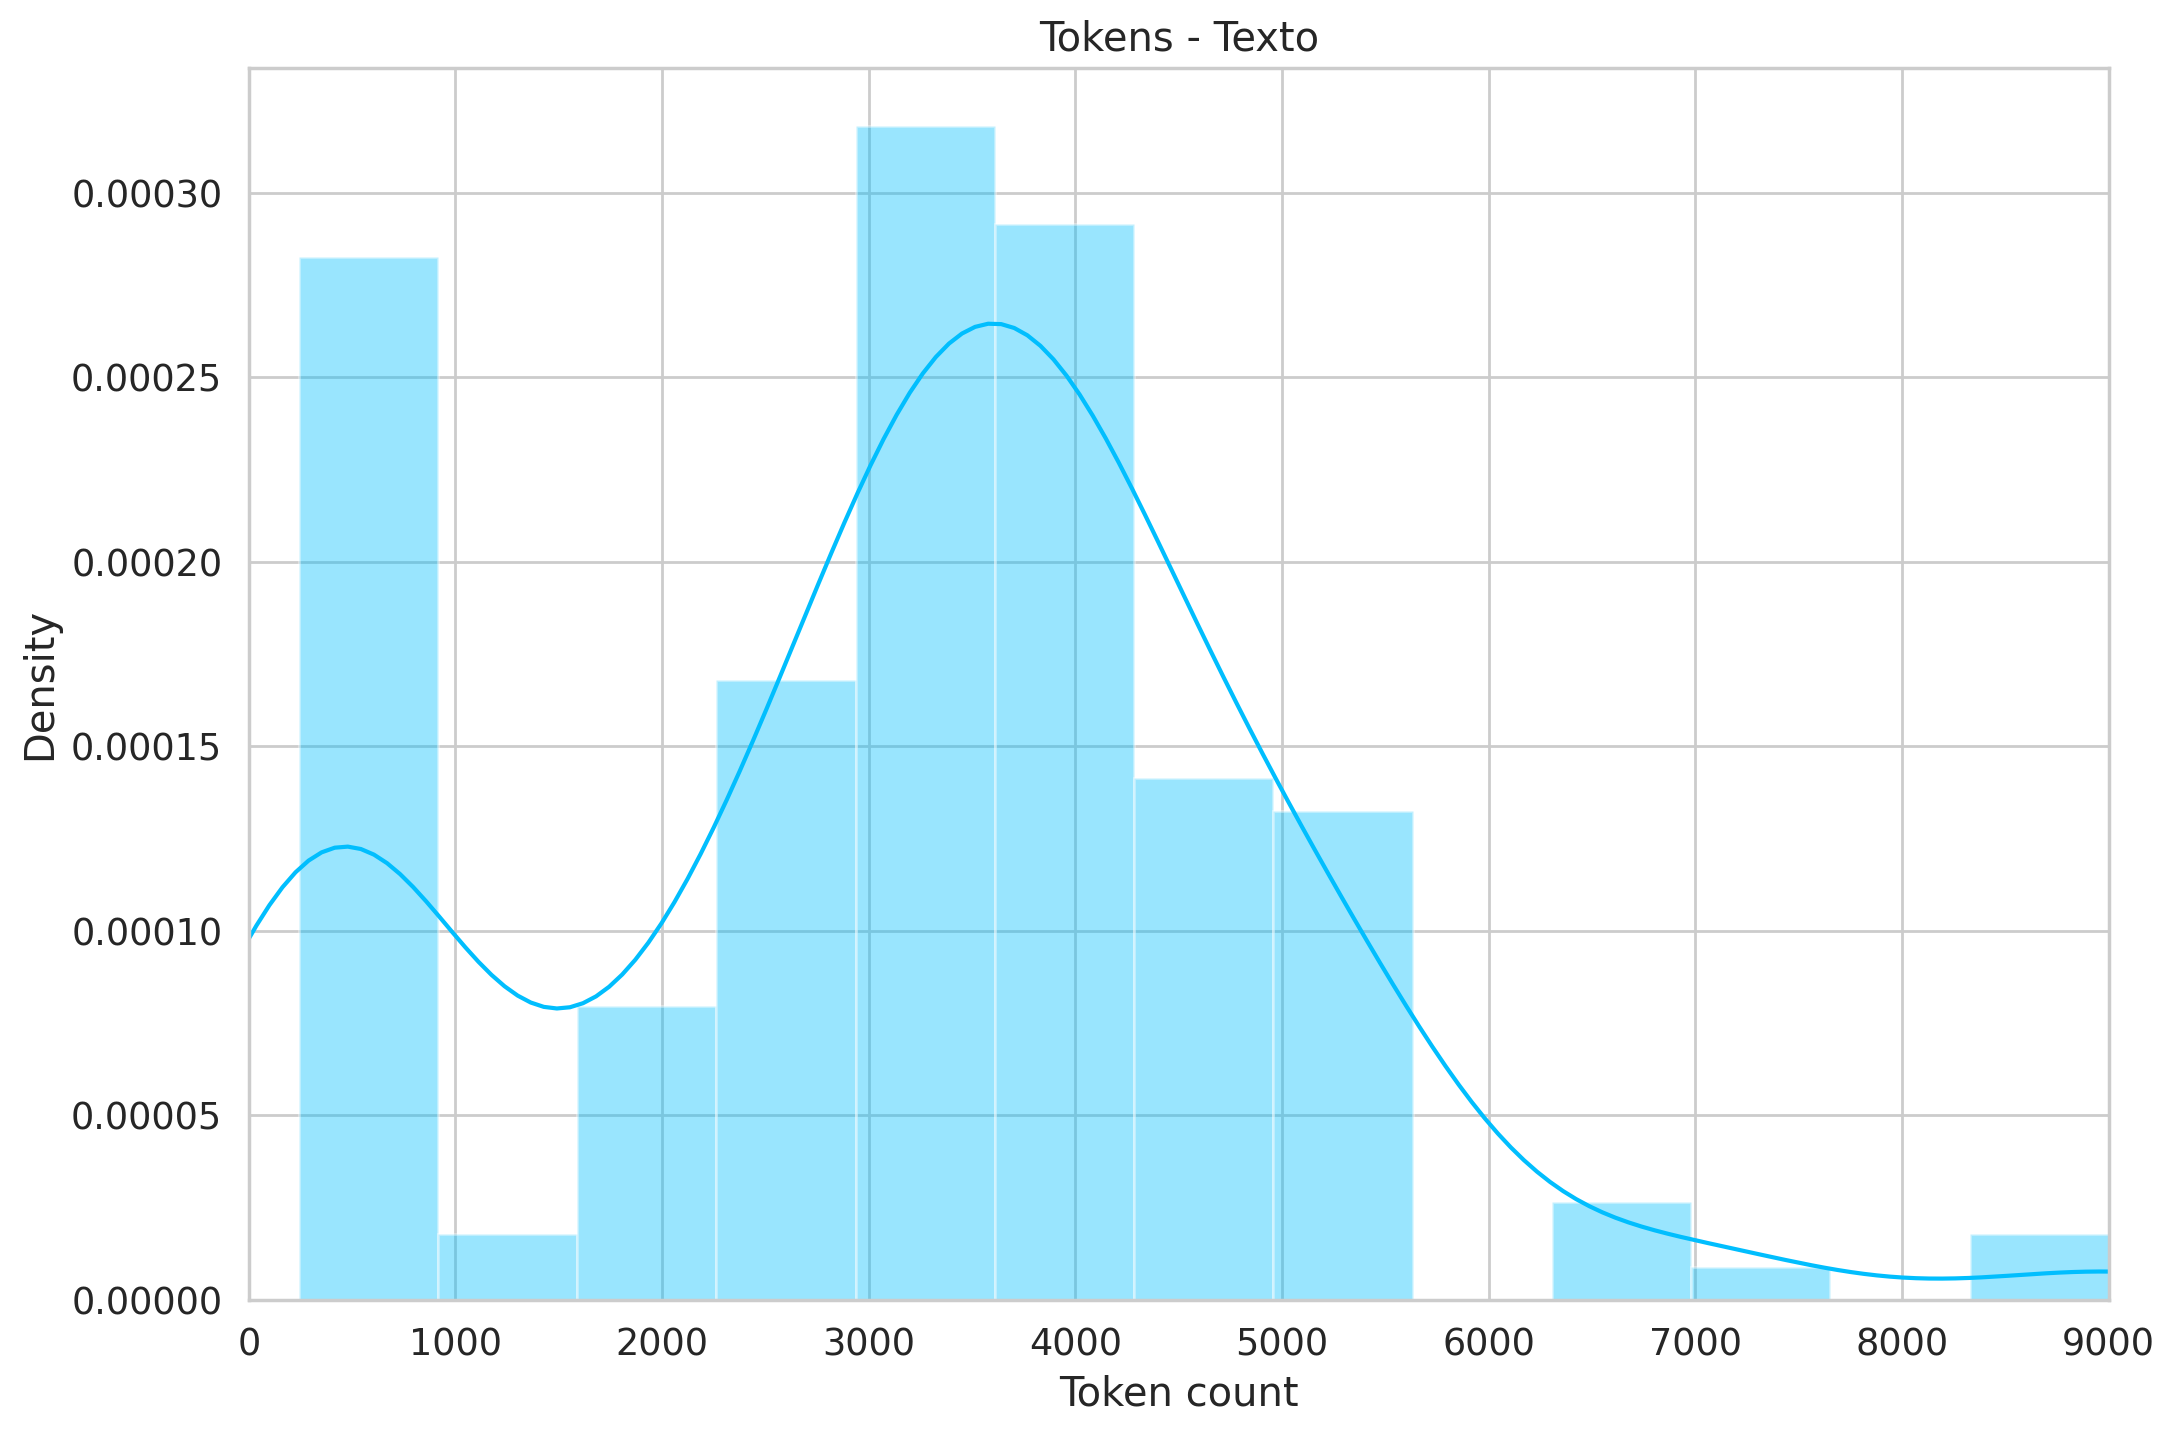

In [47]:
sns.distplot(token_lens)
plt.xlim([0, 9000])
plt.xlabel('Token count')
plt.title("Tokens - Texto")

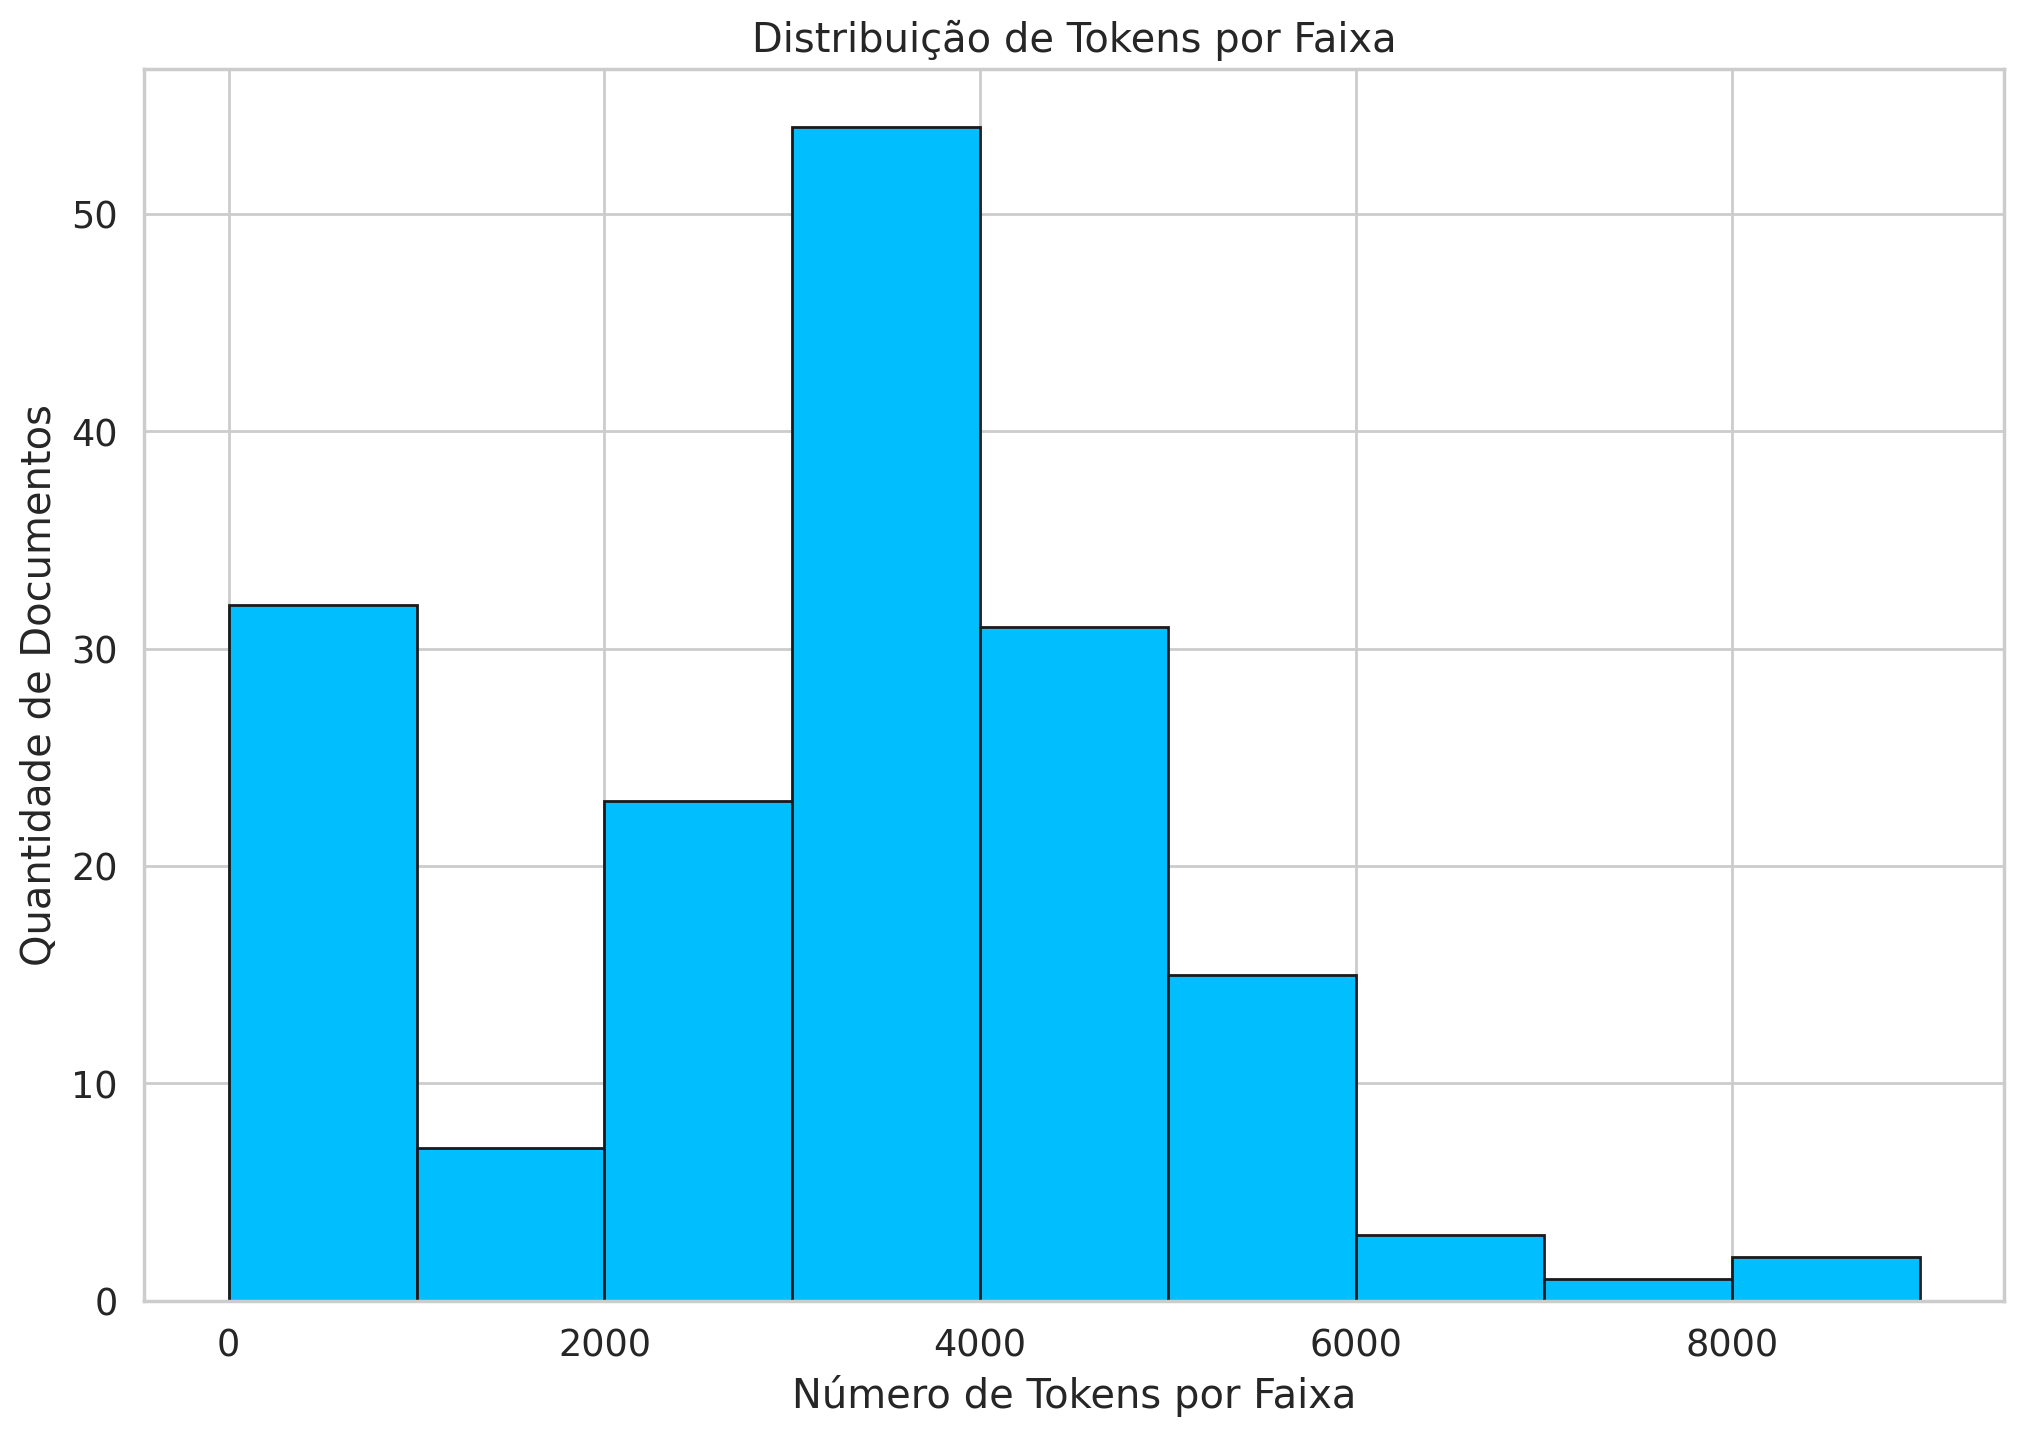

In [48]:
# type(token_lens)
# Defina os limites das faixas (bins) desejados
bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000]

# Crie o histograma
plt.hist(token_lens, bins=bins, edgecolor='k')

# Configure os rótulos do eixo x e y
plt.xlabel('Número de Tokens por Faixa')
plt.ylabel('Quantidade de Documentos')

# Configure o título do gráfico
plt.title('Distribuição de Tokens por Faixa')

# Exiba o gráfico
plt.show()

<ipython-input-49-7e271e8096a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens2)


Text(0.5, 1.0, 'Tokens - Resumo')

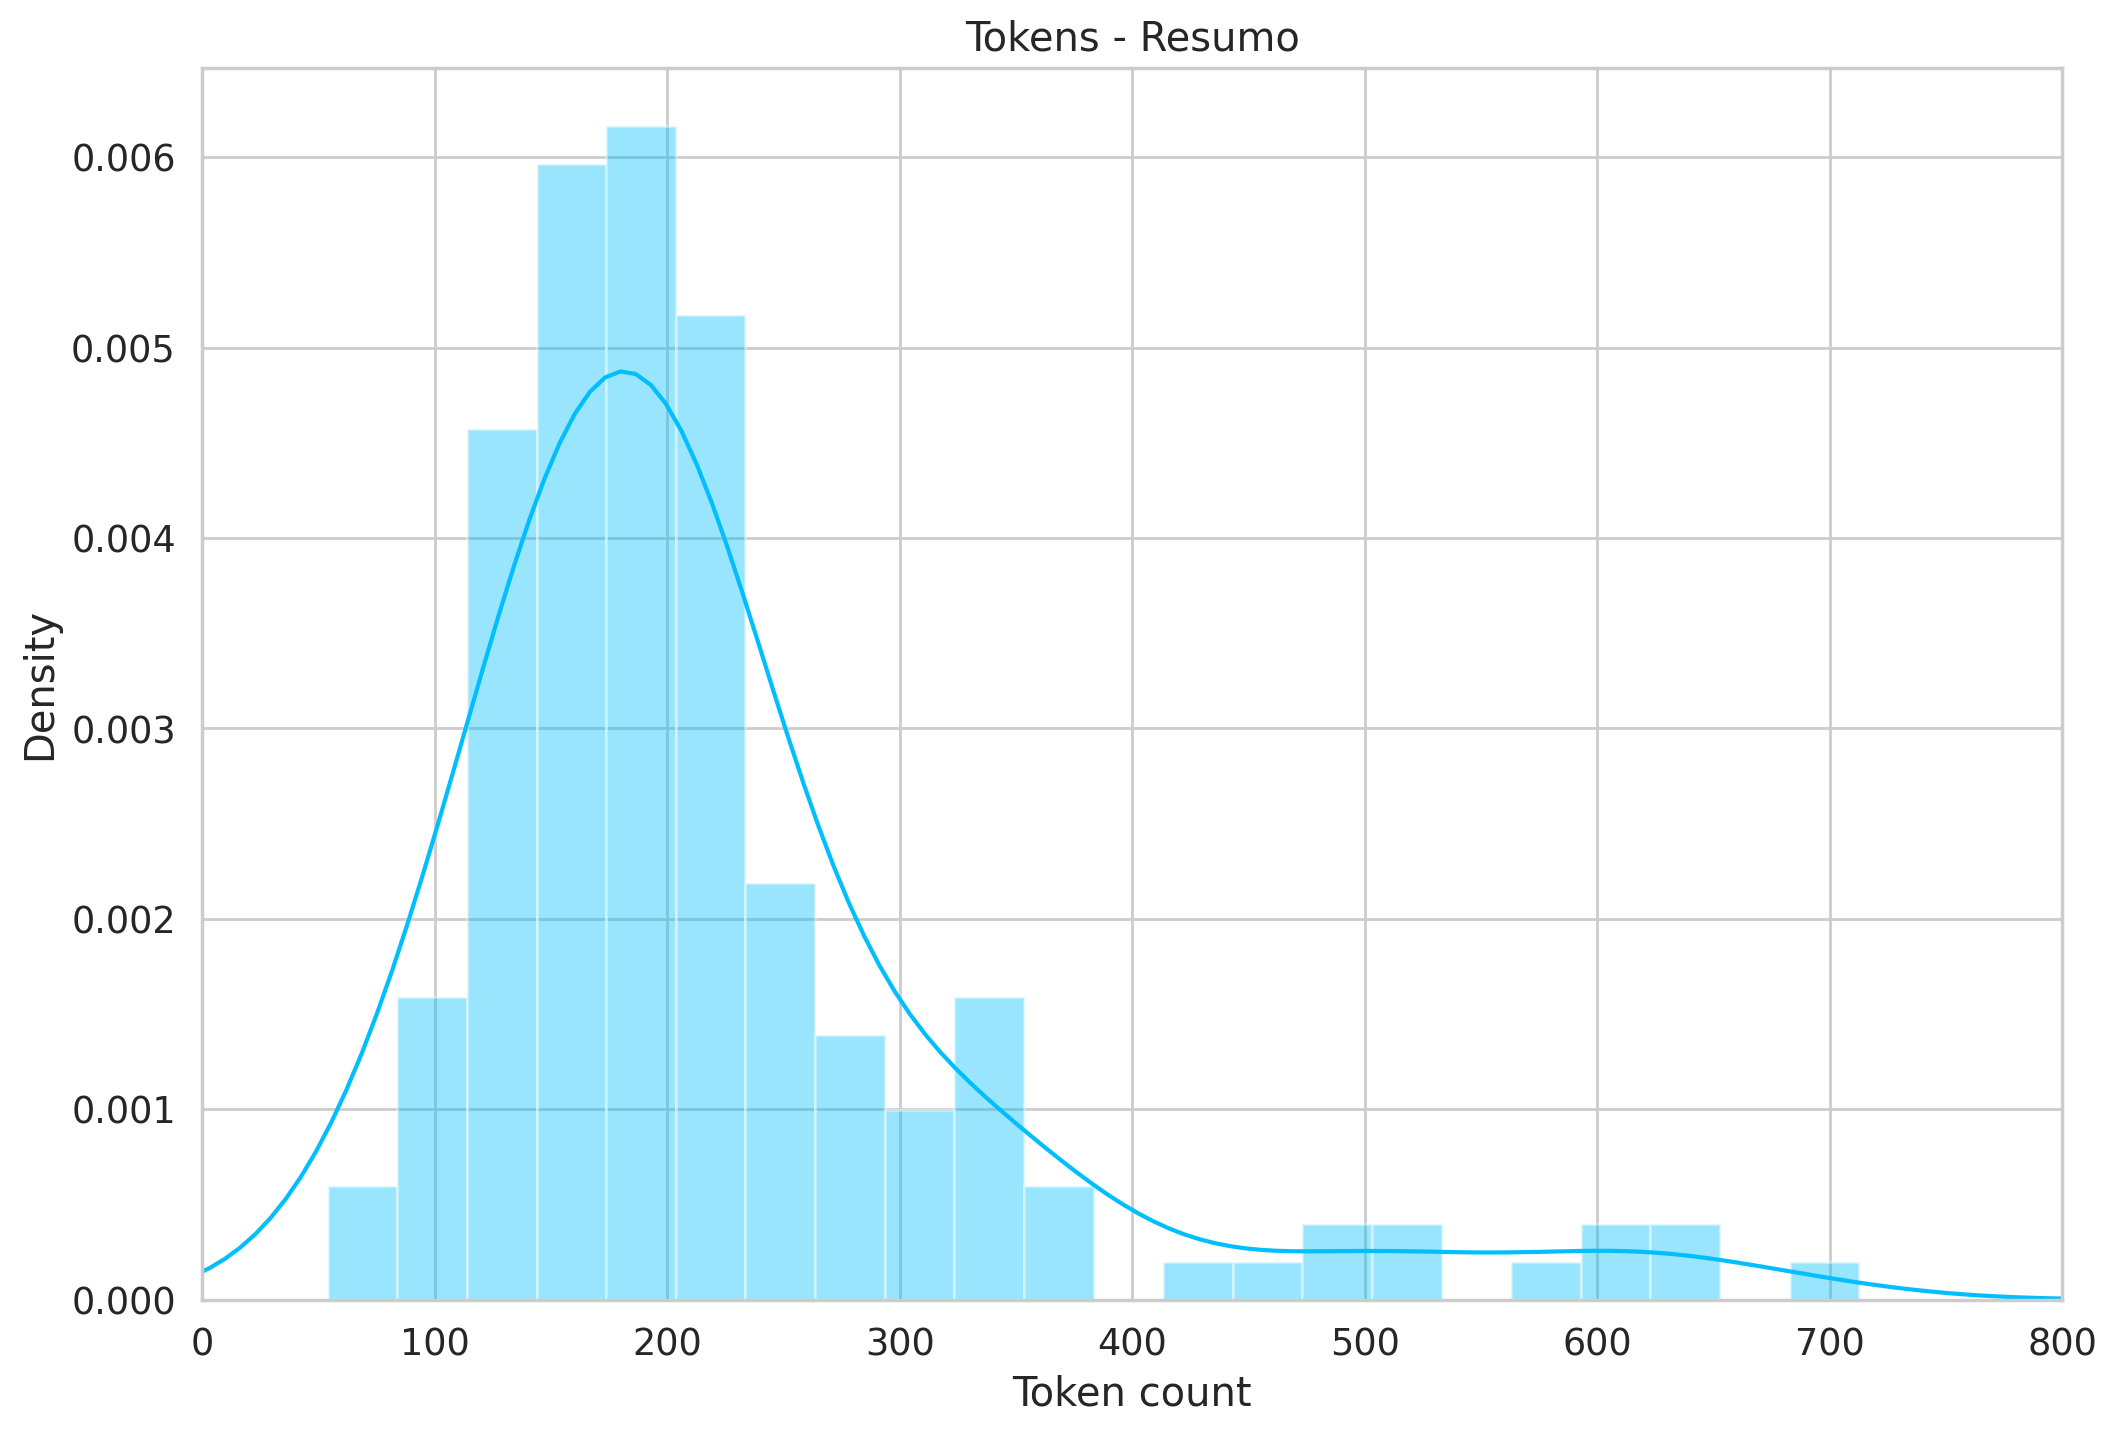

In [49]:
sns.distplot(token_lens2)
plt.xlim([0, 800])
plt.xlabel('Token count')
plt.title("Tokens - Resumo")

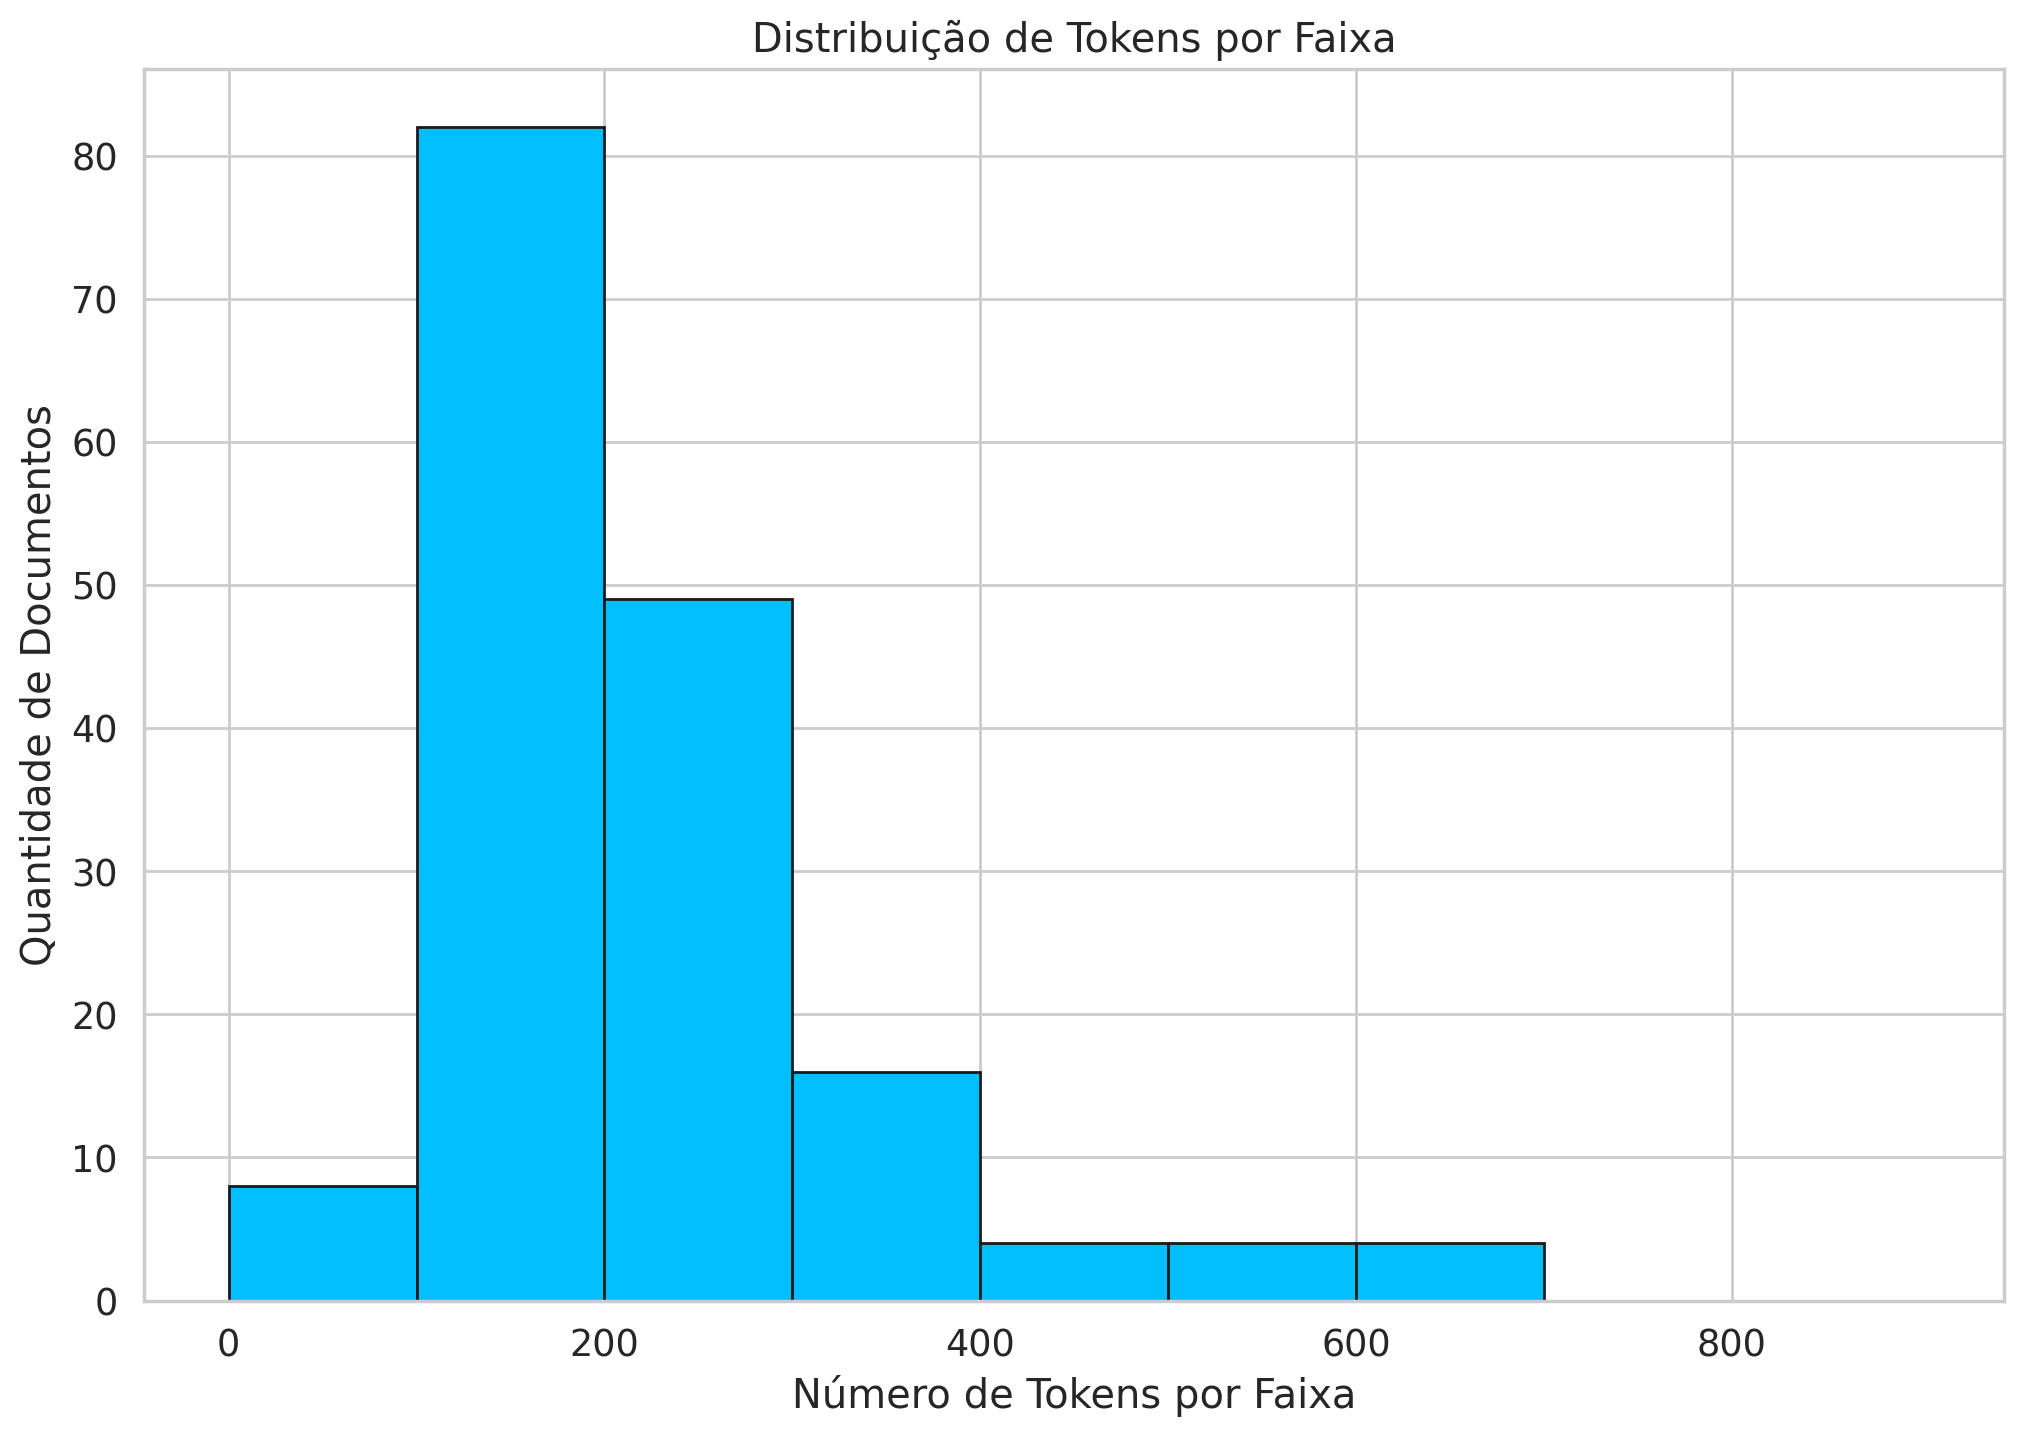

In [50]:
# type(token_lens)
# Defina os limites das faixas (bins) desejados
bins = [0,100,200,300,400,500,600,700,800,900]

# Crie o histograma
plt.hist(token_lens2, bins=bins, edgecolor='k')

# Configure os rótulos do eixo x e y
plt.xlabel('Número de Tokens por Faixa')
plt.ylabel('Quantidade de Documentos')

# Configure o título do gráfico
plt.title('Distribuição de Tokens por Faixa')

# Exiba o gráfico
plt.show()

In [51]:
df_token = pd.DataFrame(token_lens, columns=["token texto"])
summary = df_token["token texto"].describe()
summary

count     168.000000
mean     3183.226190
std      1776.591504
min       242.000000
25%      2215.750000
50%      3443.000000
75%      4204.750000
max      9000.000000
Name: token texto, dtype: float64

In [52]:
df_token2 = pd.DataFrame(token_lens2, columns=["token resumo"])
summary = df_token2["token resumo"].describe()
summary

count     168.000000
mean      226.773810
std       132.437702
min        54.000000
25%       157.750000
50%       195.000000
75%       241.250000
max      1072.000000
Name: token resumo, dtype: float64

## Salvando como CSV

In [53]:
# Exportando o DataFrame para um arquivo CSV
df.to_csv('dataset.csv', index=False)

# Outras análises do *corpus*

In [54]:
df

id                                             titulo  \
0    149  detecção de embarcações em imagens de sensores...   
1    132   uma arquitetura de alta velocidade para siste...   
2      5  acessórios para morteiro são testados no centr...   
3     94  absorvedores de micro-ondas baseados em aditiv...   
4    133  uma arquitetura para sistemas micropipeline de...   
..   ...                                                ...   
163   97  estudo para simulação da seção reta radar de a...   
164   23  exército e embraer apresentam radar desenvolvi...   
165   95  análise comparativa das técnicas de geração fo...   
166  183  rastreamento de veículos com emprego de sensor...   
167  142  planejamento de trajetória de múltiplos robôs ...   

                                                 autor  \
0    nadjane c. de almeida, carlos frederico de sá ...   
1     duarte l. oliveira, diego bompean, lester a. ...   
2                               Noticiário do Exército   
3    simone s. pinto, newton a. s. gomes, mirabel c...   
4    duarte l. oliveira, kledermon garcia, roberto ...   
..                                                 ...   
163  ricardo e. g. da silva, newton a.s. gomes, mau...   
164                             Noticiário do Exército   
165  rodrigo de faria baroni, joaquim j. barroso, j...   
166                  danilo habermann e claudio garcia   
167  johnathan fercher da rosa, paulo fernando ferr...   

                                                   url      tipo_documento  \
0    http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   
1    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
2    https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
3    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
4    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
..                                                 ...                 ...   
163  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
164  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
165  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
166  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
167  http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   

     rotulo                                             resumo  \
0         1  Neste artigo é apresentado um método de detecç...   
1         1  Projeto digital VLSI (Very Large Scale Integra...   
2         2  Rio de Janeiro (RJ) – O Centro de Avaliações d...   
3         1  Este trabalho tem como objetivo principal most...   
4         1  O paradigma assíncrono possui características ...   
..      ...                                                ...   
163       1  Os materiais absorvedores de radiação eletroma...   
164       3  Campinas (SP) – Um dia histórico para o desenv...   
165       1  A geração fotônica de sinais para aplicação em...   
166       2  Este artigo apresenta um sistema de rastreamen...   
167       2   Este artigo demonstra uma abordagem para trat...   

                                                 texto  caracteres  palavras  \
0     1. INTRODUÇÃO A extração de recursos provenie...       20039      3153   
1      I. INTRODUÇÃO Sistemas digitais contemporâne...       11471      1776   
2    Rio de Janeiro (RJ) – O Centro de Avaliações d...        1794       294   
3     I. INTRODUÇÃO Como consequência dos avanços t...       13028      2042   
4    I. INTRODUÇÃO Sistemas digitais embarcados req...       11583      1746   
..                                                 ...         ...       ...   
163  I. INTRODUÇÃO Materiais absorvedores de radiaç...       11885      1842   
164  Campinas (SP) – Um dia histórico para o desenv...        2869       454   
165   I. INTRODUÇÃO A geração de sinais de radiofre...       22463      3590   
166   I. INTRODUÇÃO De

## Nuvem de palavras por faixa TRL

In [55]:
# !pip install unicodedata

In [56]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import string
# from unidecode import unidecode
import unicodedata

- Minúscula

In [57]:
df['texto'] = df['texto'].str.lower()
df['resumo'] = df['resumo'].str.lower()

- Pontuação

In [58]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [59]:
df['texto'] = df['texto'].apply(remove_punctuation)
df['resumo'] = df['resumo'].apply(remove_punctuation)

- Número

In [60]:
df['texto'] = df['texto'].str.replace(r'\d', '', regex=True)
df['resumo'] = df['resumo'].str.replace(r'\d', '', regex=True)

- Acentuação

In [61]:
# stop_words
# Perceba que stop_words considera o acento, por isso a rmeoção posterior

In [62]:
def remover_acentos(text):
    return ''.join(char for char in unicodedata.normalize('NFD', text) if not unicodedata.combining(char))

In [63]:
teste = "distância"
remover_acentos(teste)

'distancia'

In [64]:
df['texto'] = df['texto'].apply(remover_acentos)

In [65]:
df['resumo'] = df['resumo'].apply(remover_acentos)

- Ou simplesmente:

In [66]:
df['texto'] = df['texto'].str.replace(r'[^a-zA-Z ]', '', regex=True)
df['resumo'] = df['resumo'].str.replace(r'[^a-zA-Z ]', '', regex=True)

- Tokenização e remoção de stop words

In [67]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [68]:
stop_words_sem_acentos = {remover_acentos(word) for word in stop_words}

In [69]:
def preprocess_text(text):
    # Tokenização das palavras
    words = word_tokenize(text, language='portuguese')
    # Remoção das stop words
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words_sem_acentos and word.isalpha()]
    return " ".join(filtered_words)

In [70]:
df['texto_processado'] = df['texto'].apply(preprocess_text)
df['resumo_processado'] = df['resumo'].apply(preprocess_text)

In [71]:
df['texto']

0        introducao a extracao de recursos provenient...
1        i introducao sistemas digitais contemporaneo...
2      rio de janeiro rj  o centro de avaliacoes do e...
3       i introducao como consequencia dos avancos te...
4      i introducao sistemas digitais embarcados requ...
                             ...                        
163    i introducao materiais absorvedores de radiaca...
164    campinas sp  um dia historico para o desenvolv...
165     i introducao a geracao de sinais de radiofreq...
166     i introducao desde  a agencia americana darpa...
167      introducao a robotica vem evoluindo muito na...
Name: texto, Length: 168, dtype: object

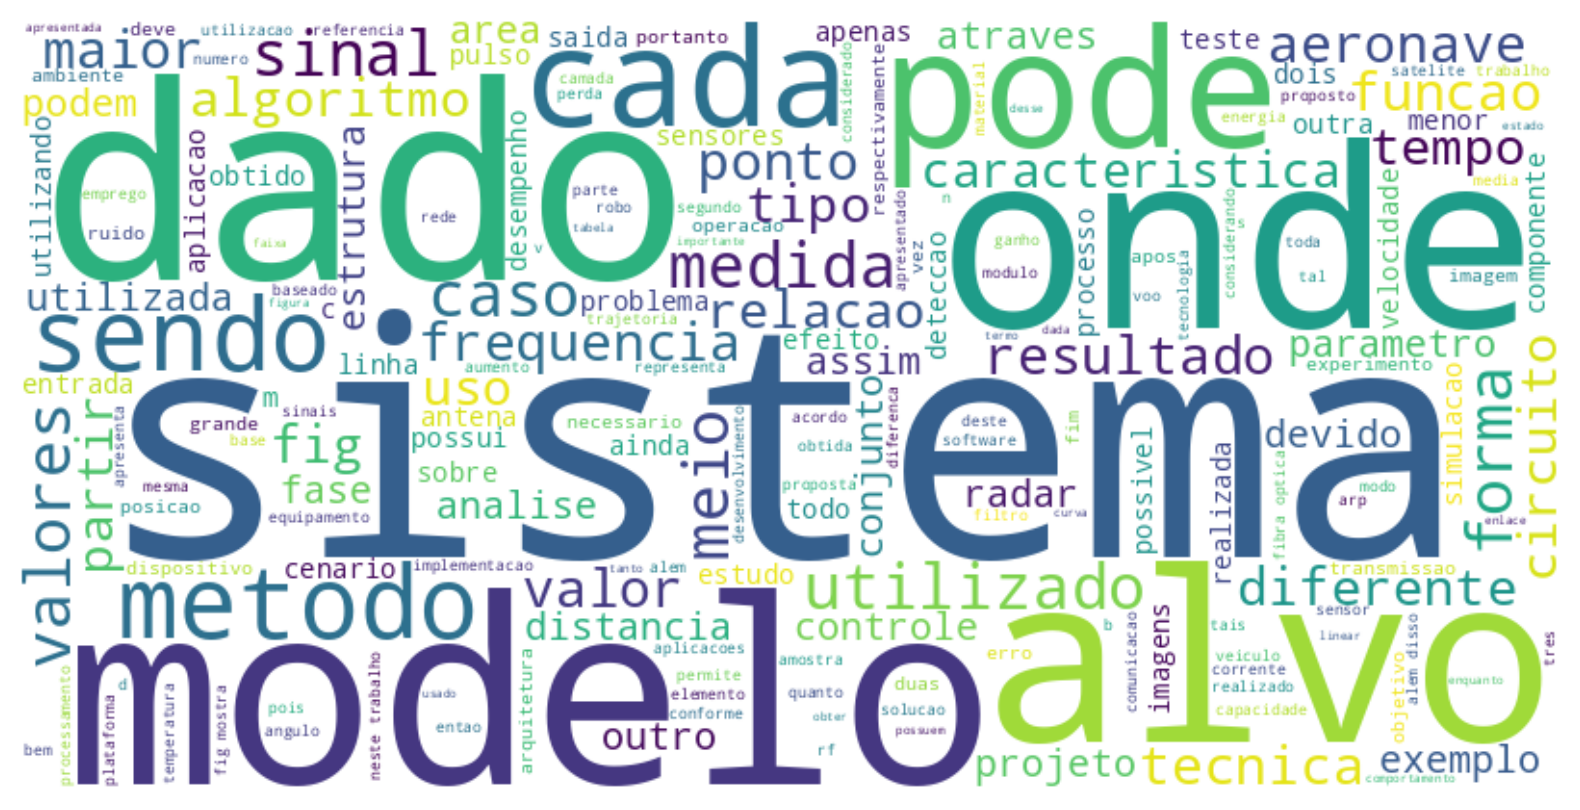

In [87]:
# Concatene todos os textos processados em um único texto
all_text = " ".join(df['texto_processado'])

# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate(all_text)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('nuvemTexto.png')

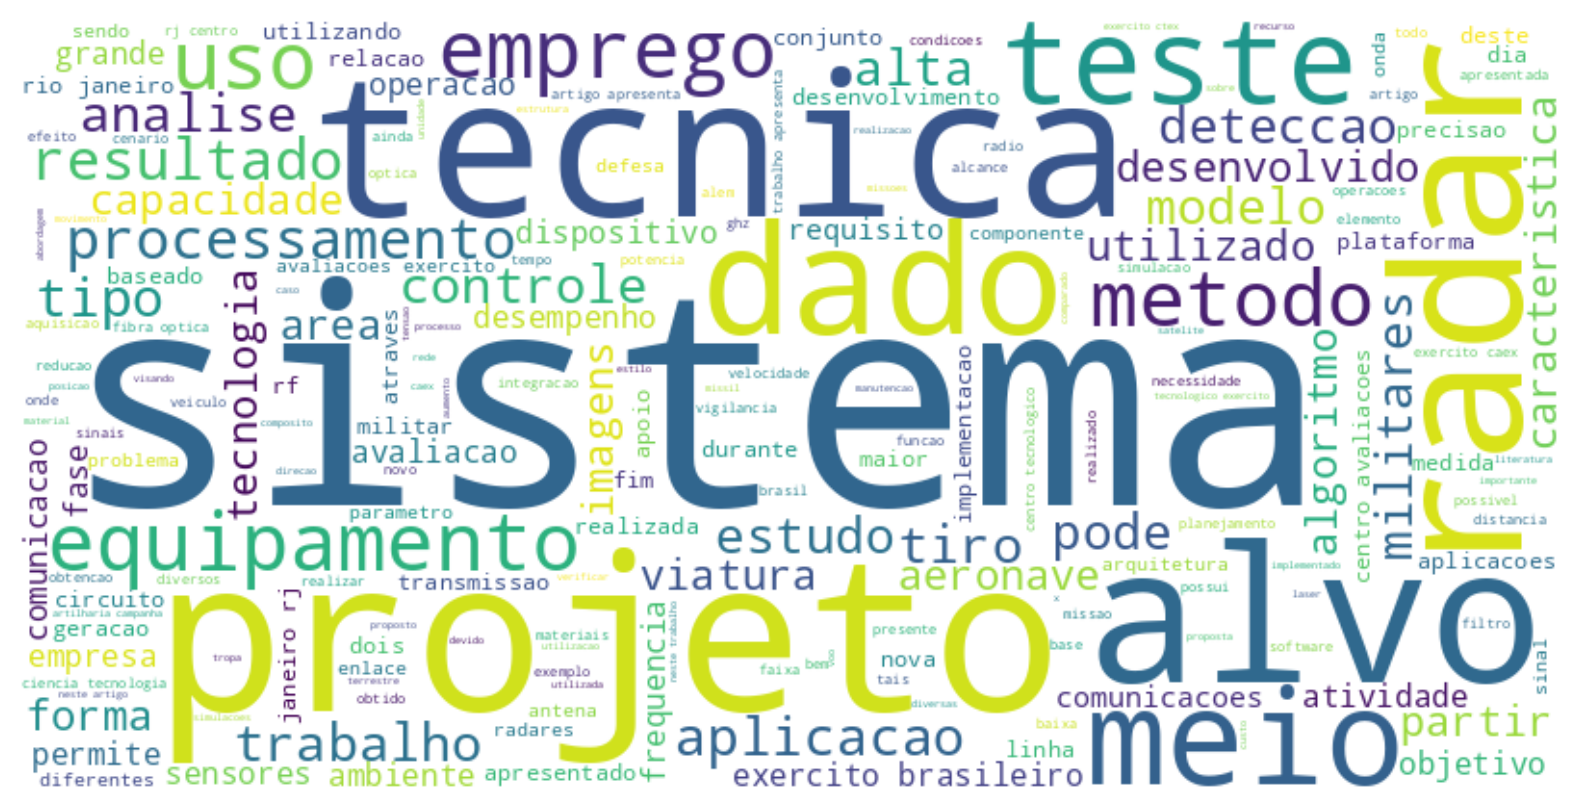

In [88]:
# Concatene todos os textos processados em um único texto
all_resumo = " ".join(df['resumo_processado'])

# Crie a nuvem de palavras
wordcloud2 = WordCloud(width=800, height=400, background_color='white')
wordcloud2.generate(all_resumo)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud2.to_file('nuvemResumo.png')

### Nuvem de palavras por faixa:

In [76]:
linhas_fx_1 = df[df['rotulo'] == 1]
linhas_fx_2 = df[df['rotulo'] == 2]
linhas_fx_3 = df[df['rotulo'] == 3]

In [77]:
# Concatene todos os textos processados em um único texto
all_text_f1 = " ".join(linhas_fx_1['texto_processado'])
all_text_f2 = " ".join(linhas_fx_2['texto_processado'])
all_text_f3 = " ".join(linhas_fx_3['texto_processado'])

In [78]:
all_resumo_f1 = " ".join(linhas_fx_1['resumo_processado'])
all_resumo_f2 = " ".join(linhas_fx_2['resumo_processado'])
all_resumo_f3 = " ".join(linhas_fx_3['resumo_processado'])

- Texto:

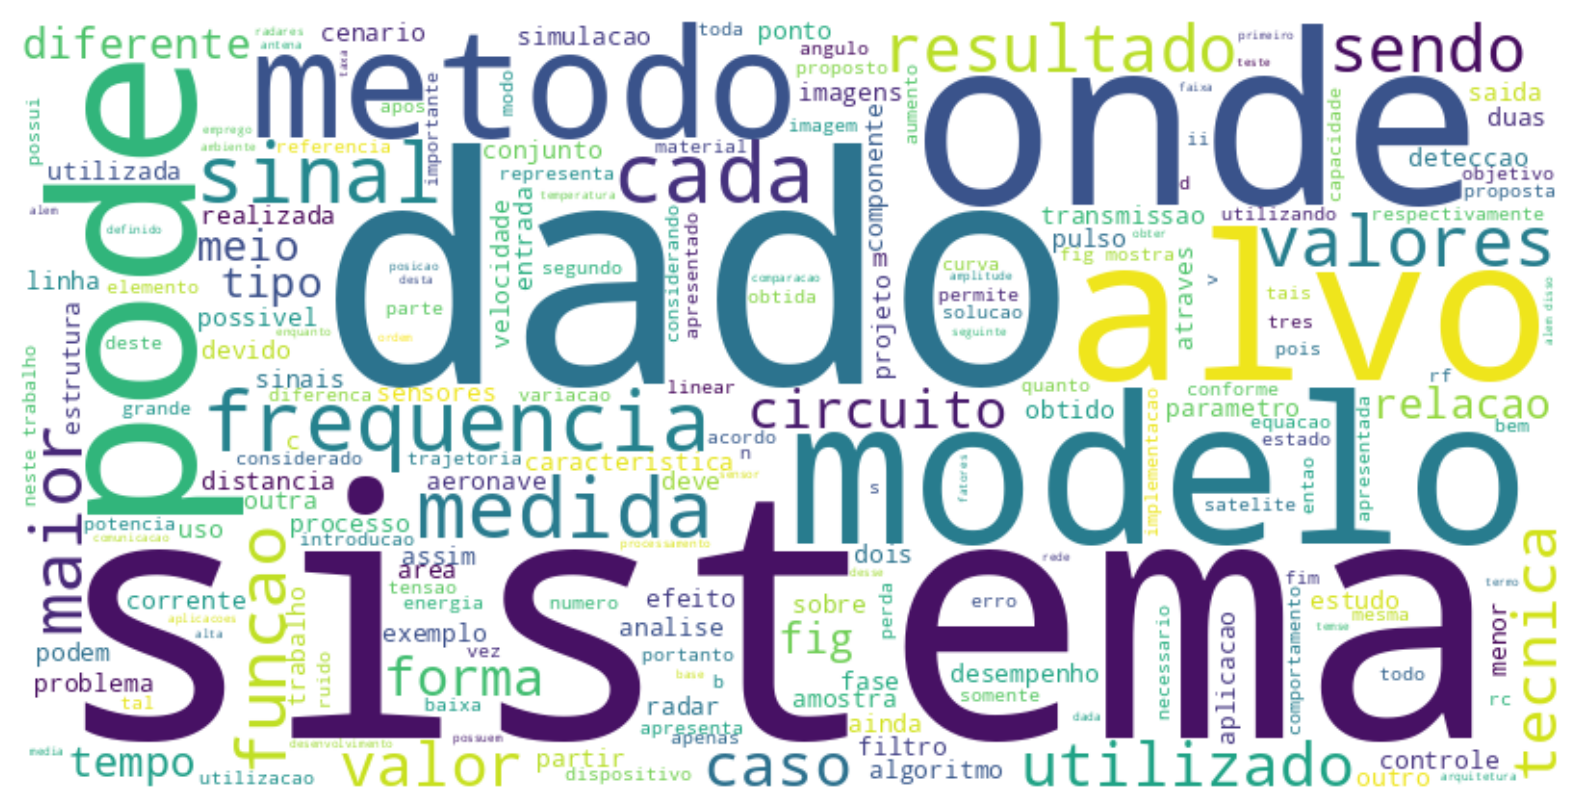

In [79]:
# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text_f1)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('nuvemTexo1.png')

In [95]:
t_all_text_f1 = nltk.word_tokenize(all_text_f1)
freq_fx1 = FreqDist(t_all_text_f1)
freq_fx1 = freq_fx1.most_common(10)
freq_fx1

[('fig', 1064),
 ('sinal', 728),
 ('frequencia', 577),
 ('dados', 542),
 ('sistema', 540),
 ('pode', 521),
 ('forma', 454),
 ('onde', 448),
 ('radar', 443),
 ('tempo', 439)]

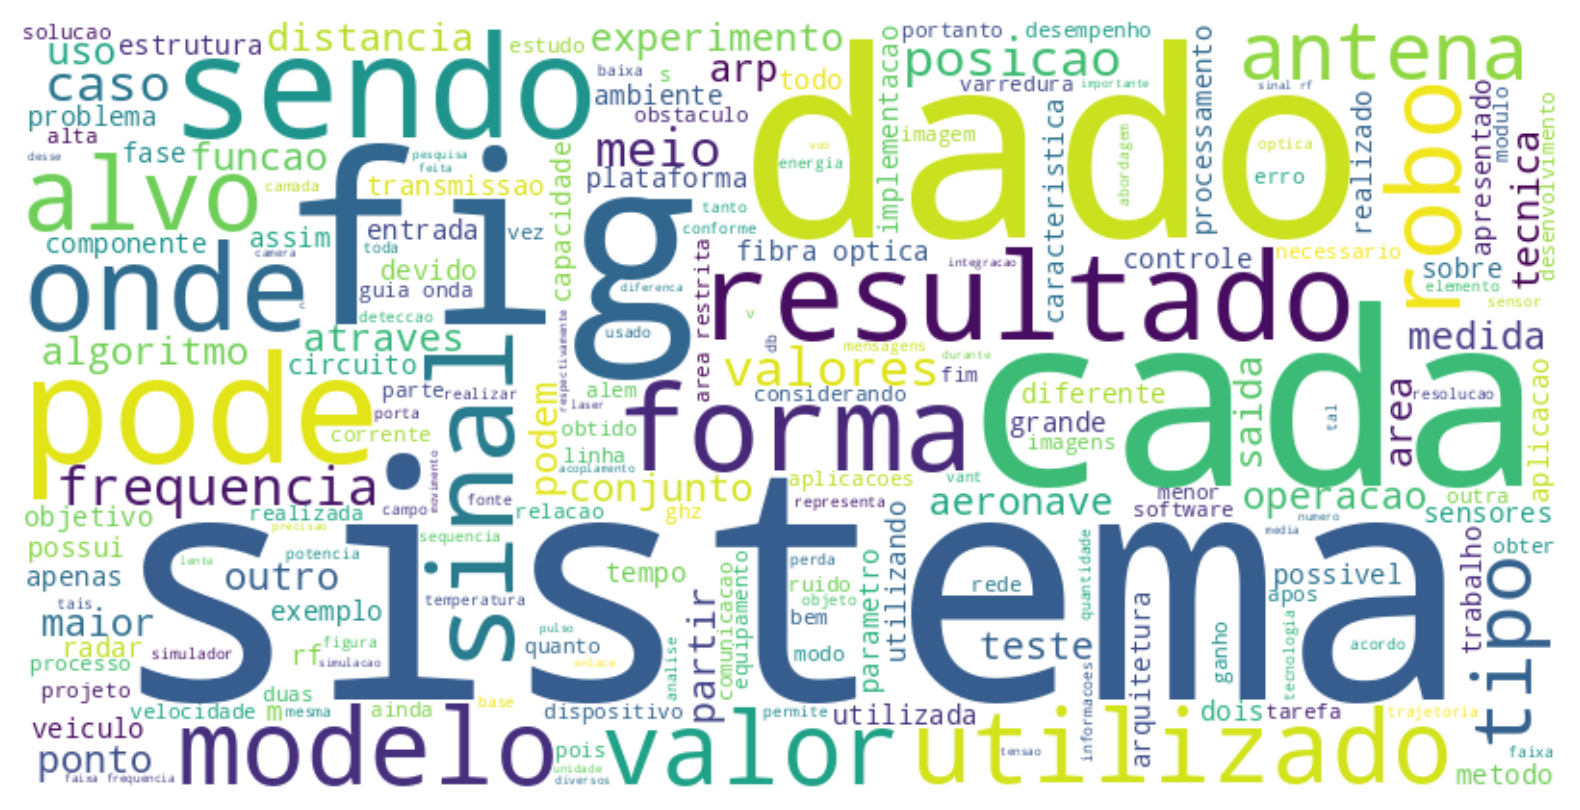

In [80]:
# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text_f2)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('nuvemTexo2.png')

In [96]:
t_all_text_f2 = nltk.word_tokenize(all_text_f2)
freq_fx2 = FreqDist(t_all_text_f2)
freq_fx2 = freq_fx2.most_common(10)
freq_fx2

[('fig', 393),
 ('sinal', 307),
 ('dados', 291),
 ('sistema', 283),
 ('frequencia', 253),
 ('rf', 238),
 ('cada', 234),
 ('sinais', 234),
 ('pode', 200),
 ('forma', 195)]

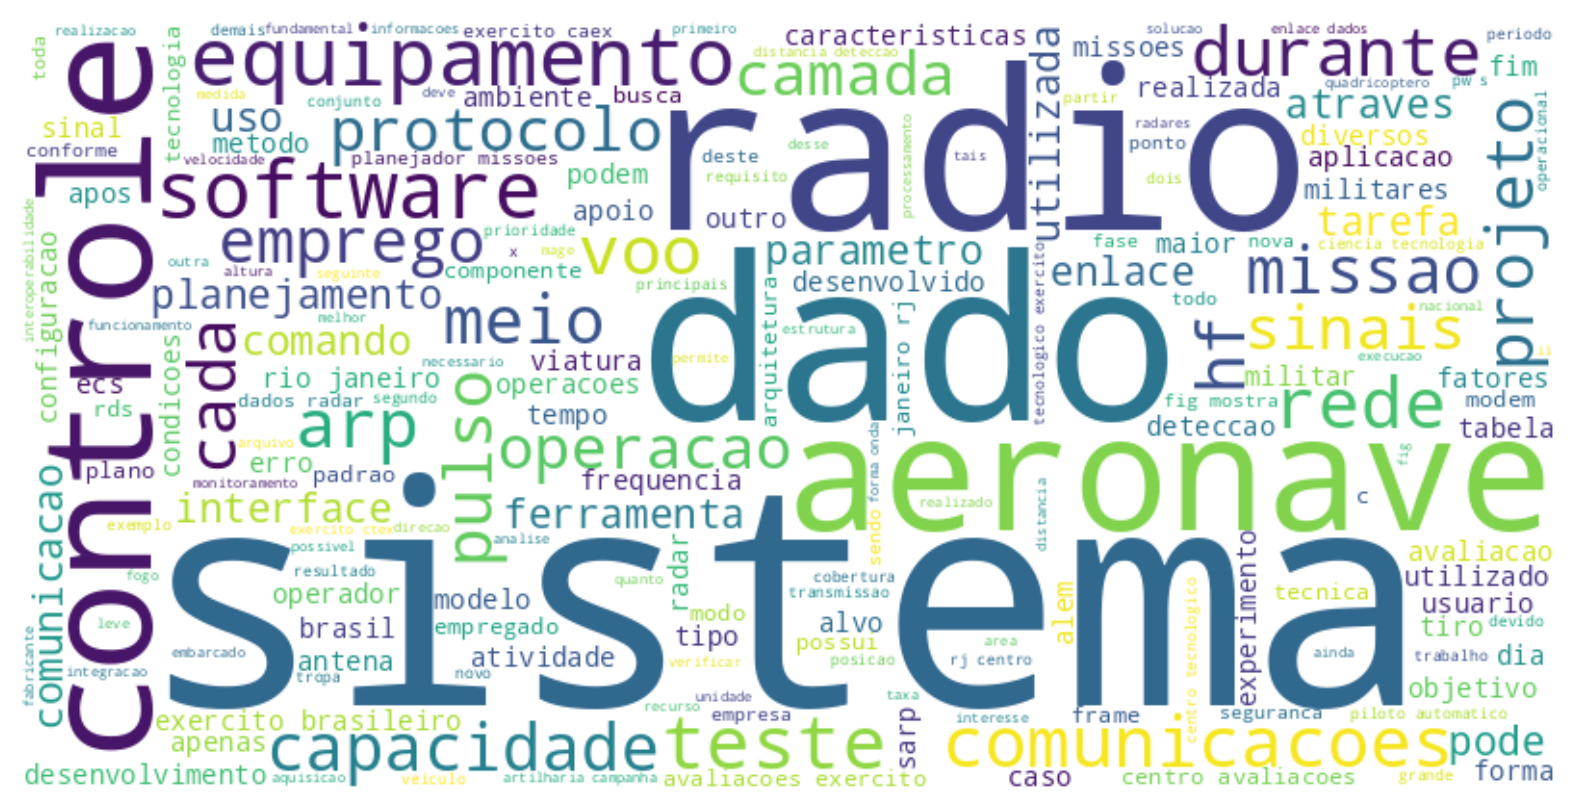

In [81]:
# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text_f3)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('nuvemTexo3.png')

In [97]:
t_all_text_f3 = nltk.word_tokenize(all_text_f3)
freq_fx3 = FreqDist(t_all_text_f3)
freq_fx3 = freq_fx3.most_common(10)
freq_fx3

[('sistema', 149),
 ('dados', 113),
 ('exercito', 103),
 ('controle', 93),
 ('hf', 79),
 ('radio', 57),
 ('testes', 55),
 ('comunicacoes', 54),
 ('software', 52),
 ('defesa', 49)]

- Resumo:

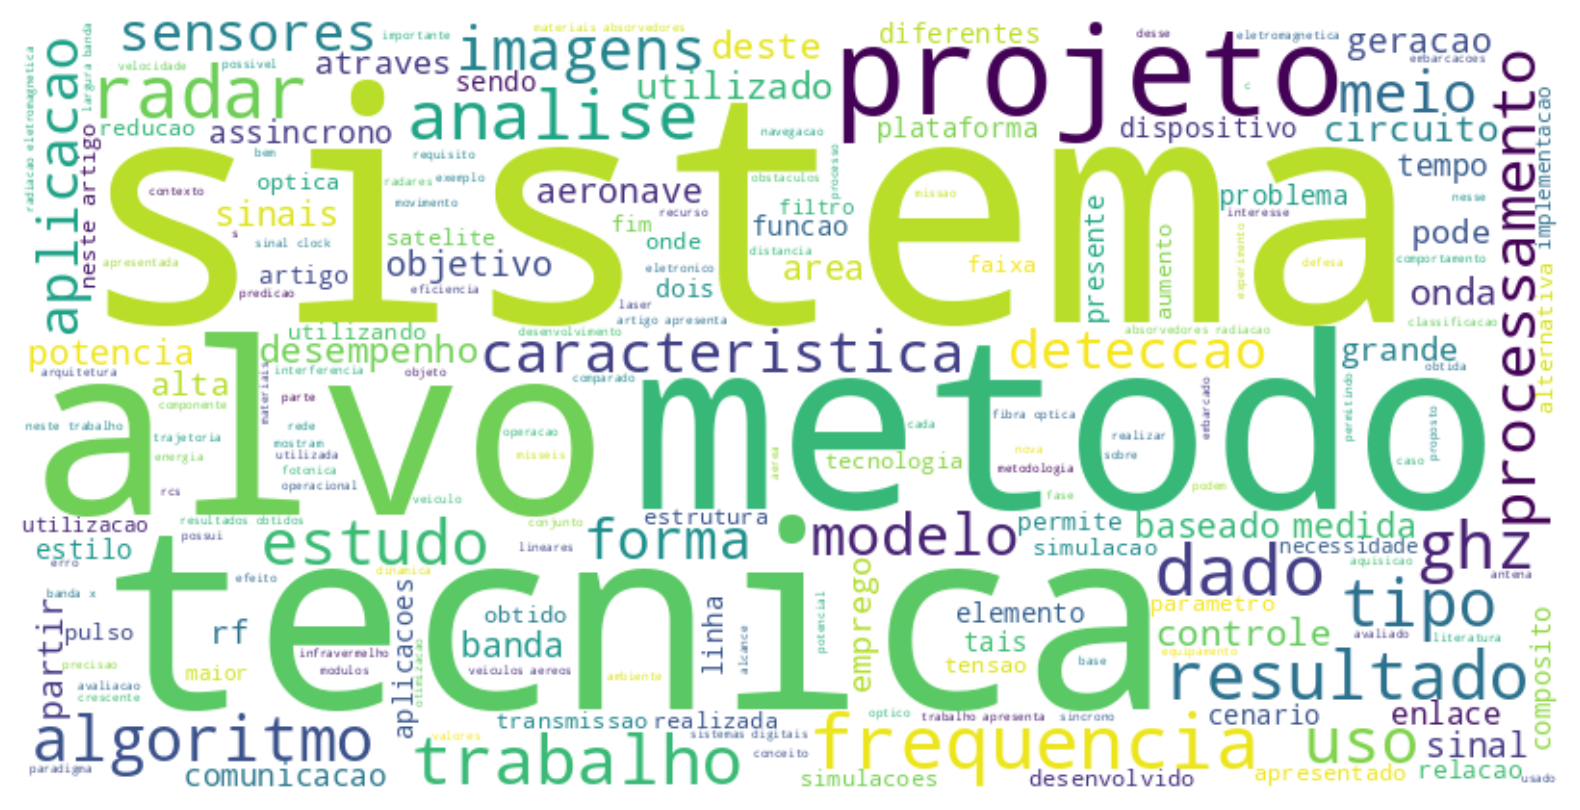

In [82]:
# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_resumo_f1)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('nuvemResumo1.png')

In [98]:
t_all_resumo_f1 = nltk.word_tokenize(all_resumo_f1)
freq_fx1 = FreqDist(t_all_resumo_f1)
freq_fx1 = freq_fx1.most_common(10)
freq_fx1

[('trabalho', 54),
 ('sistemas', 48),
 ('artigo', 37),
 ('resultados', 37),
 ('radar', 37),
 ('metodo', 36),
 ('banda', 35),
 ('uso', 29),
 ('imagens', 28),
 ('projeto', 27)]

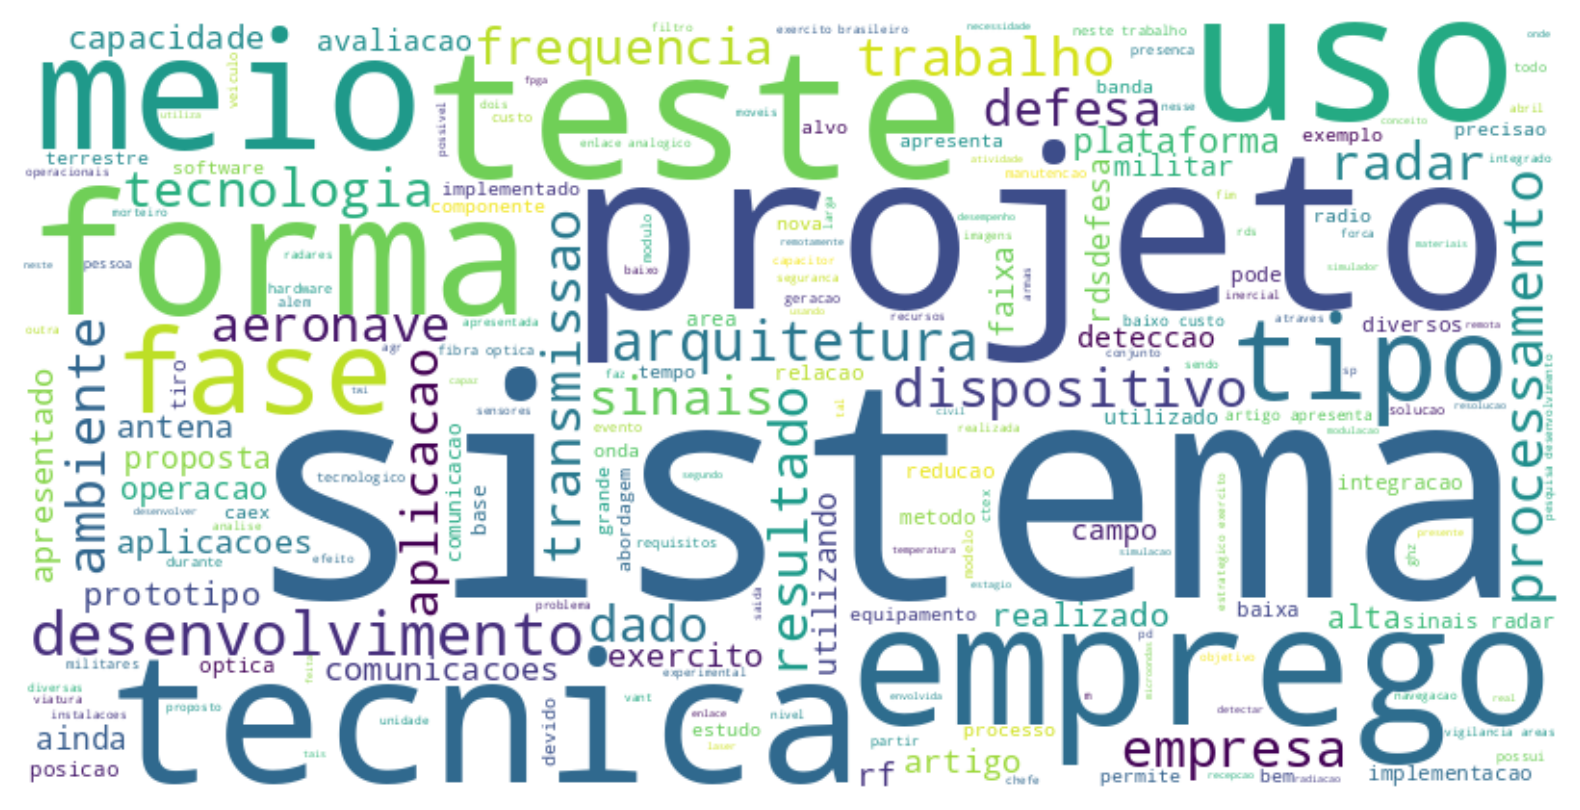

In [83]:
# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_resumo_f2)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('nuvemResumo2.png')

In [99]:
t_all_resumo_f2 = nltk.word_tokenize(all_resumo_f2)
freq_fx2 = FreqDist(t_all_resumo_f2)
freq_fx2 = freq_fx2.most_common(10)
freq_fx2

[('sistema', 39),
 ('exercito', 24),
 ('radar', 23),
 ('projeto', 22),
 ('sinais', 19),
 ('desenvolvimento', 18),
 ('sistemas', 18),
 ('trabalho', 18),
 ('artigo', 17),
 ('uso', 16)]

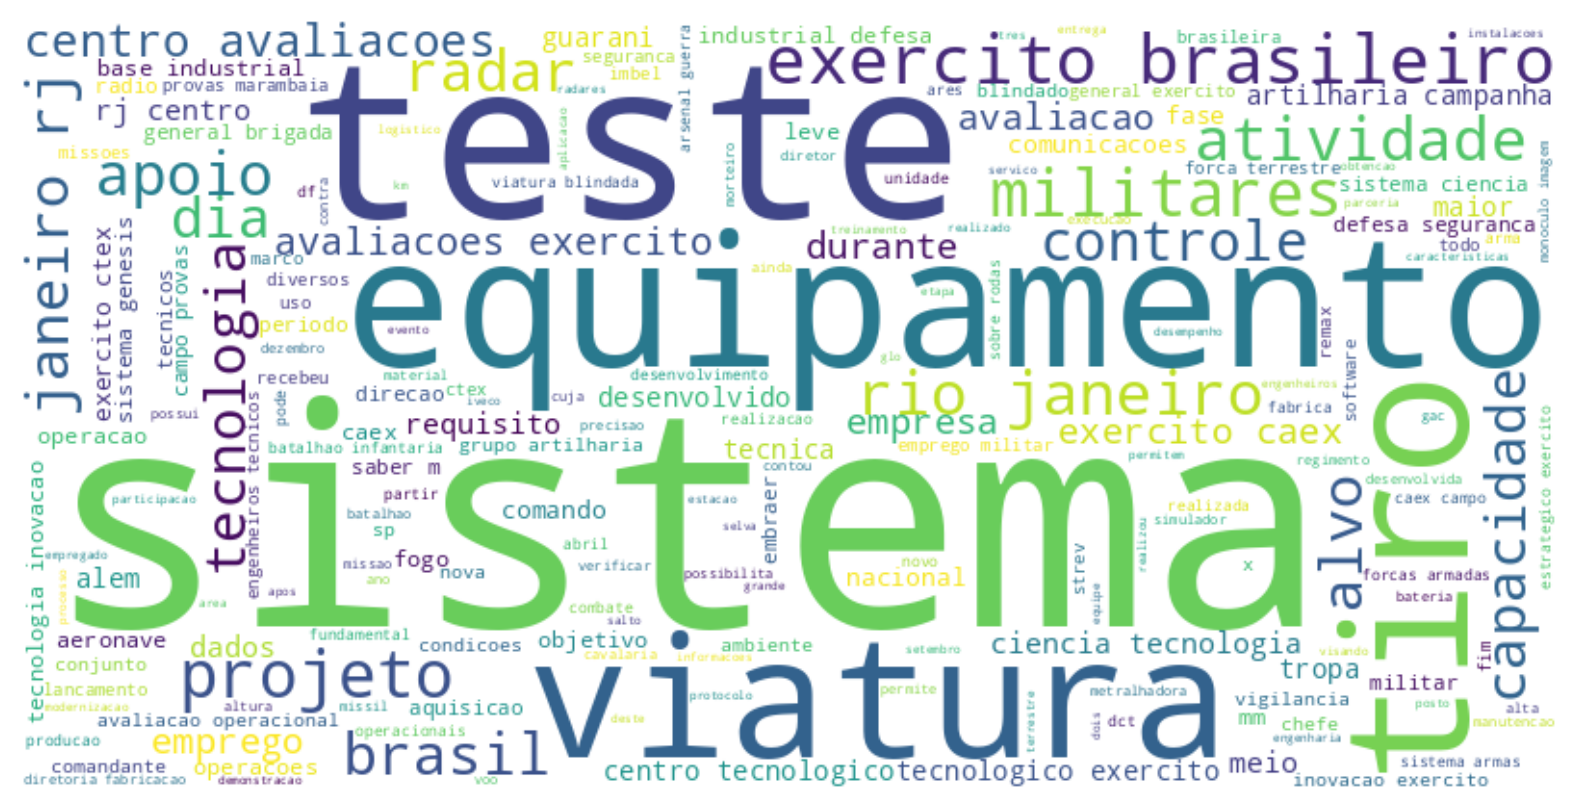

In [84]:
# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_resumo_f3)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('nuvemResumo3.png')

In [100]:
t_all_resumo_f3 = nltk.word_tokenize(all_resumo_f3)
freq_fx3 = FreqDist(t_all_resumo_f3)
freq_fx3 = freq_fx3.most_common(10)
freq_fx3

[('exercito', 98),
 ('sistema', 83),
 ('testes', 40),
 ('tecnologia', 39),
 ('centro', 34),
 ('caex', 34),
 ('defesa', 32),
 ('brasileiro', 31),
 ('artilharia', 29),
 ('rio', 27)]